## This map takes a couple of minutes to draw -- so we save it as a pickle file and reload

<IPython.core.display.Javascript object>


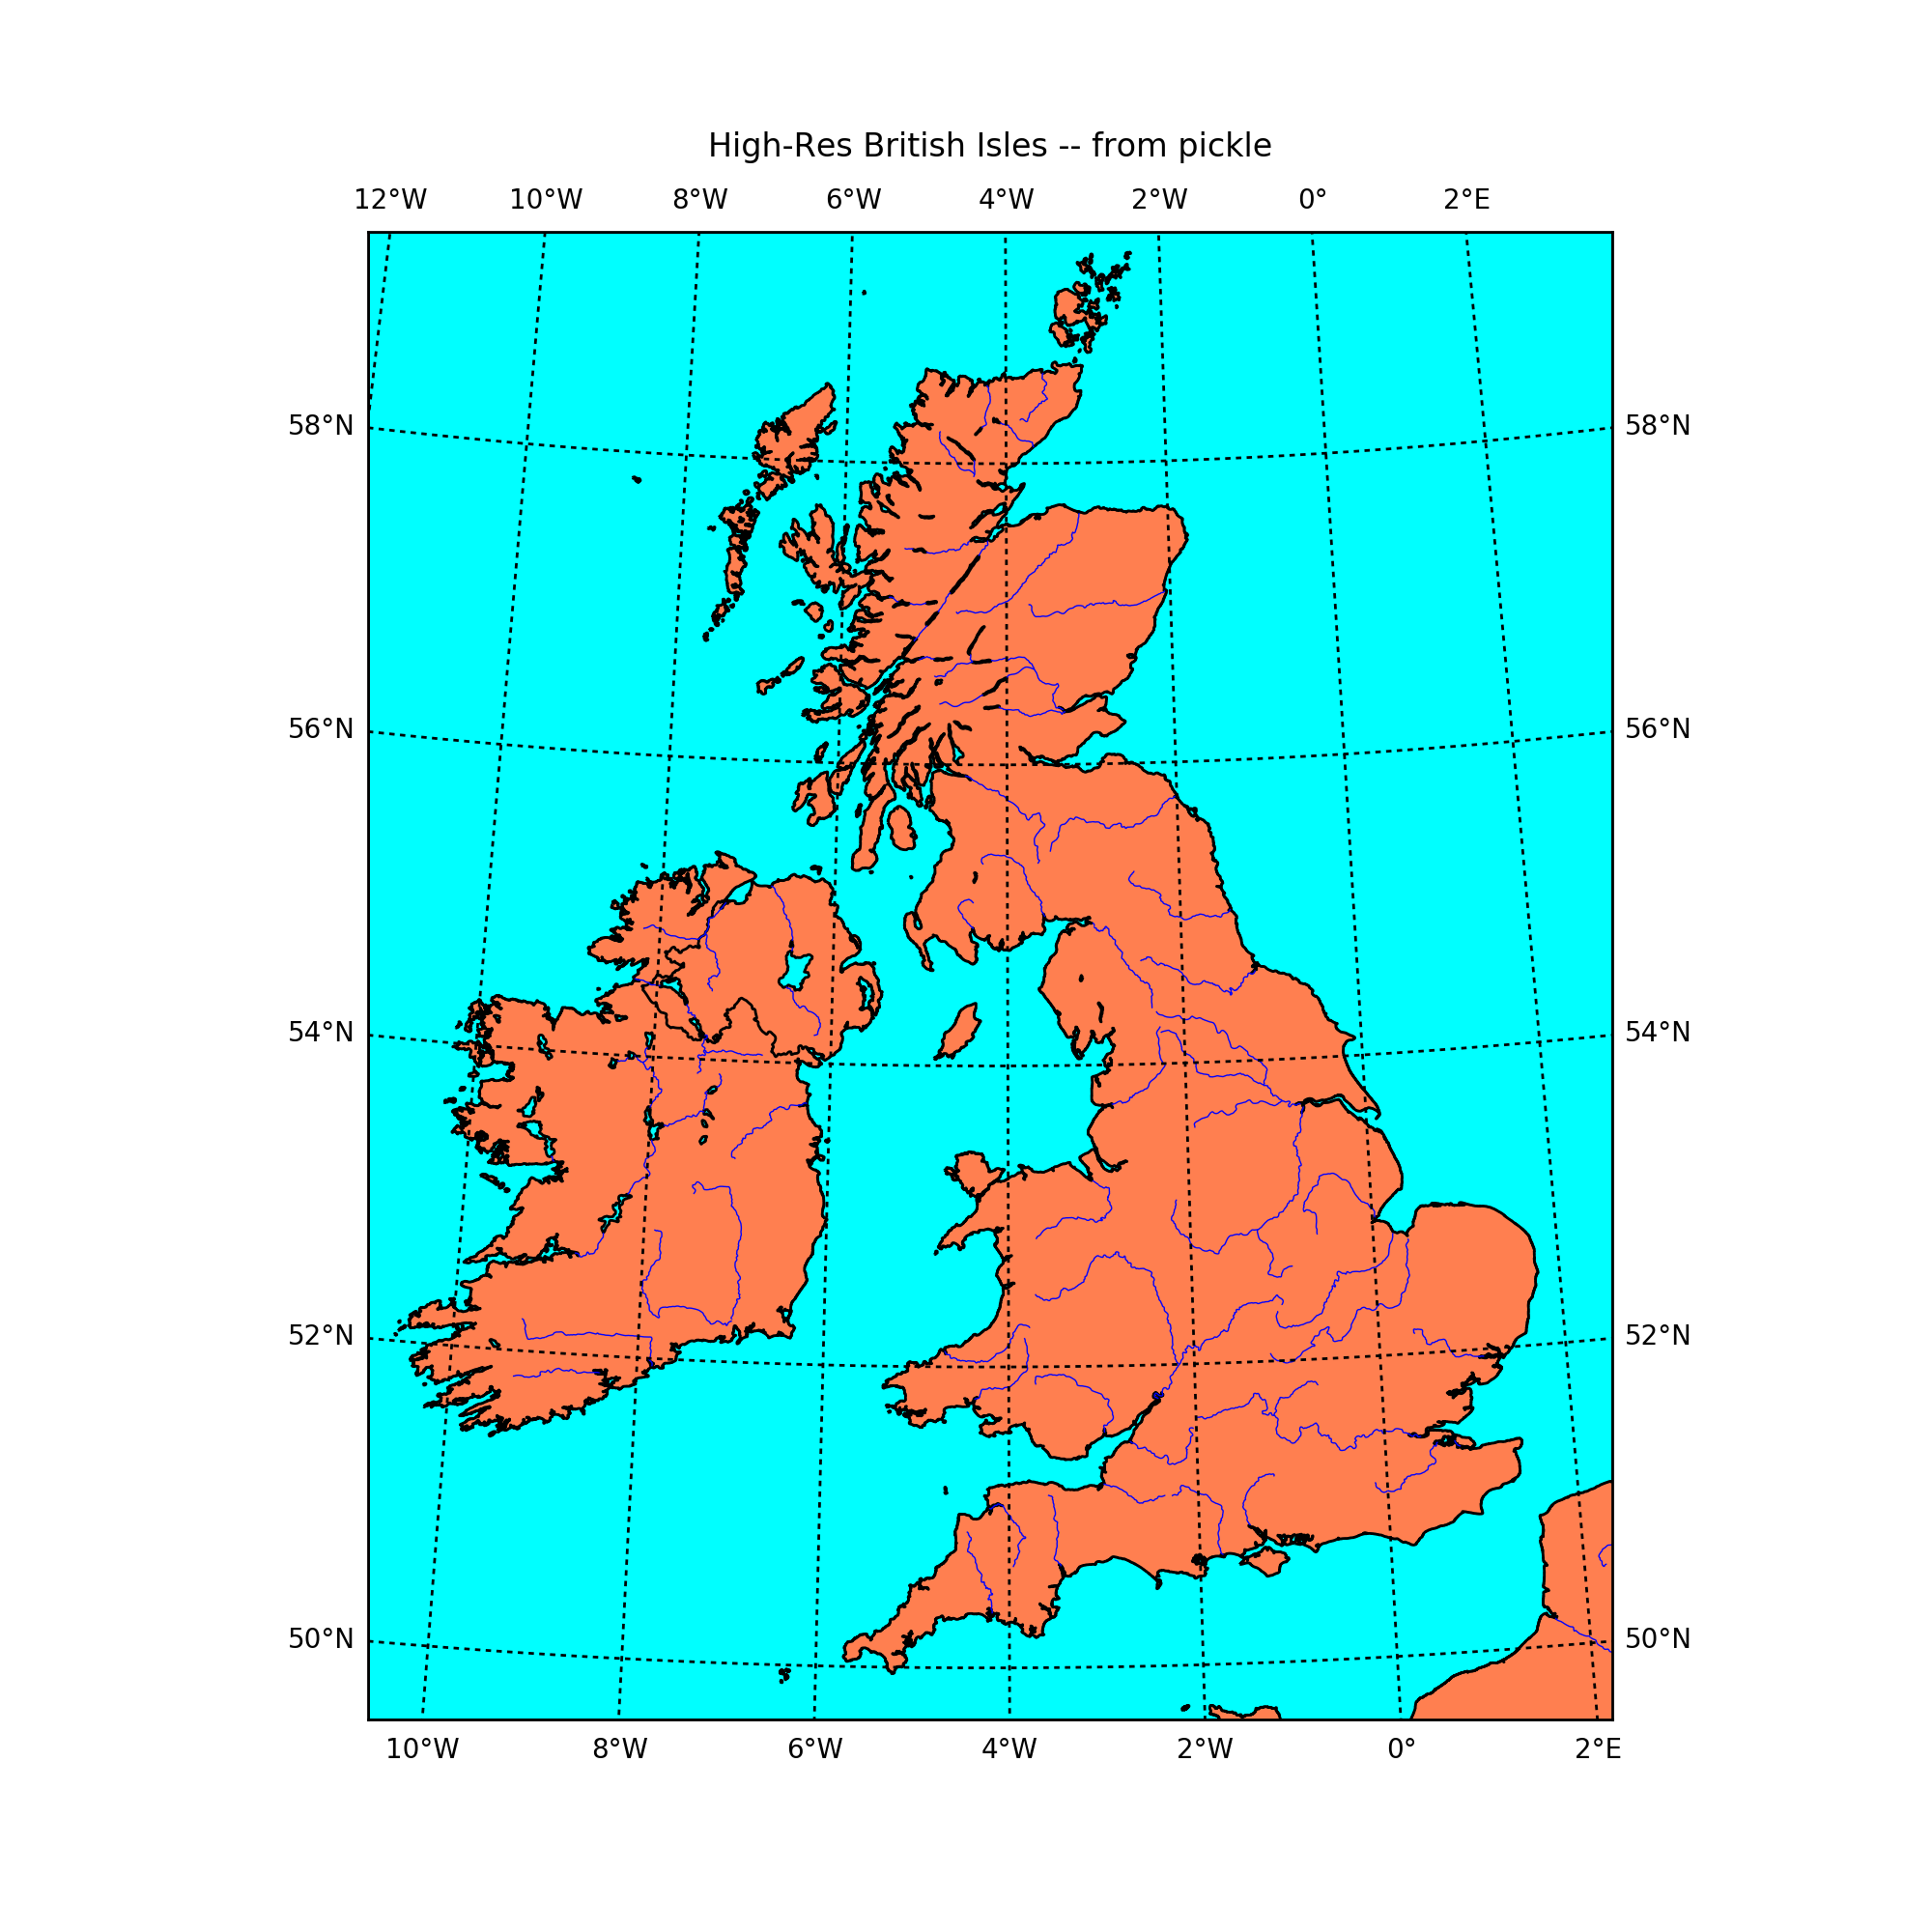

<IPython.core.display.Javascript object>


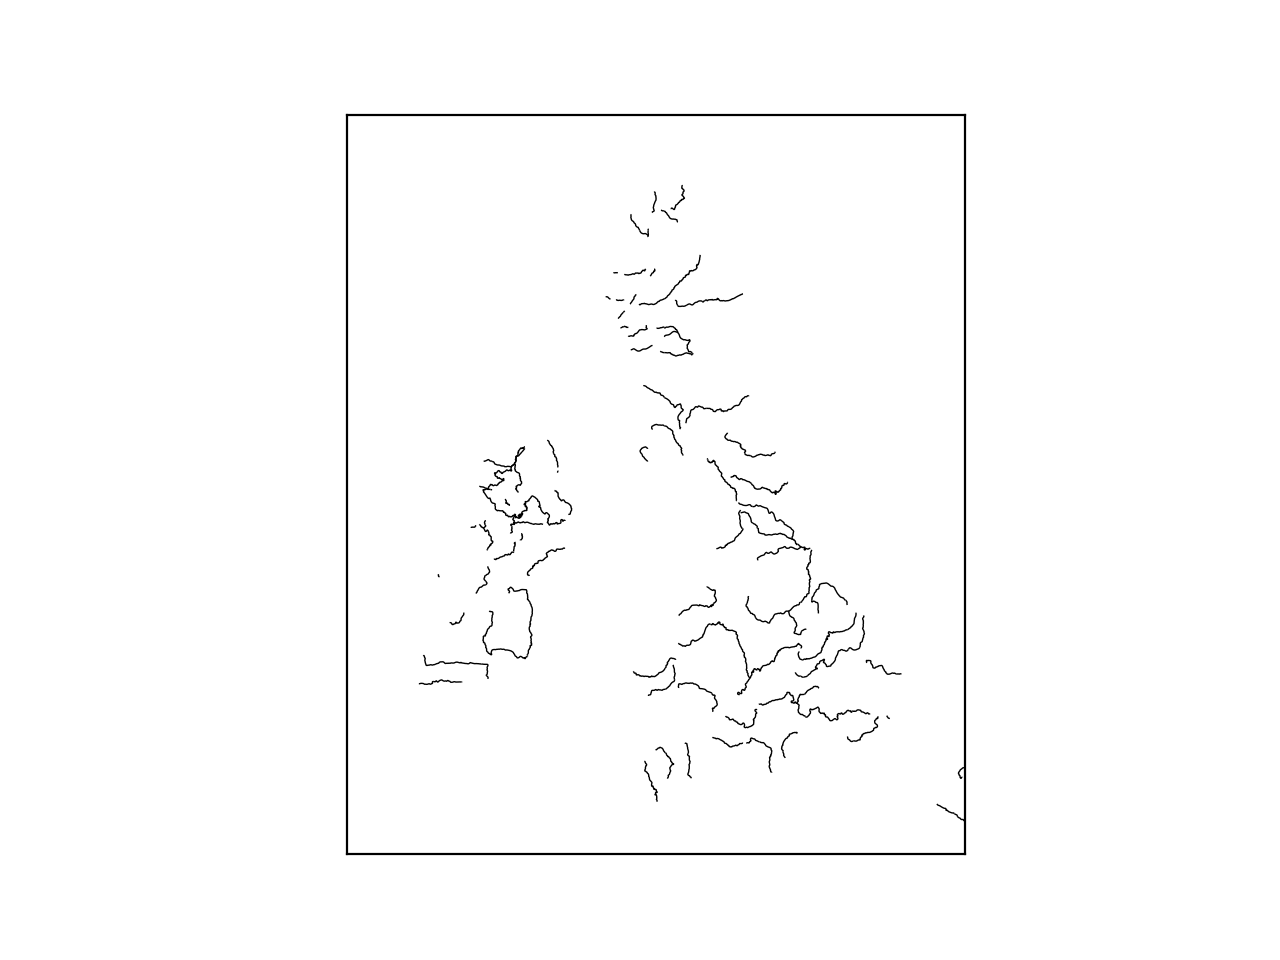

0.7065021363005162  secs to plot using using a pickled Basemap instance


In [1]:
#use the interactive plotting backend
%matplotlib notebook
from __future__ import print_function
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pickle, time

#
# to pickle this map, set save_map=True
#
save_map=False
pkfile='map.pkl'
if save_map:
    fig, ax = plt.subplots(1,1)
    # create Basemap instance. Use 'high' resolution coastlines.
    t1 = time.clock()
    m = Basemap(width=920000,height=1100000,
                resolution='f',projection='tmerc',lon_0=-4.2,lat_0=54.6,ax=ax)
    # make sure countries and rivers are loaded
    m.drawcountries()
    m.drawrivers()
    print(time.clock()-t1,' secs to create original Basemap instance')
    fig.savefig('fig1.png')
    # pickle the class instance.
    pickle.dump(m,open(pkfile,'wb'),-1)
#
# read in the pickled map
#
# clear the figure
plt.close('all')
fig1, ax = plt.subplots(1,1,figsize=(10,10))
# read pickle back in and plot it again (should be much faster).
t1 = time.clock()
m2 = pickle.load(open(pkfile,'rb'))
m2.ax=ax
# draw coastlines and fill continents.
m2.drawcoastlines(ax=ax)
# fill continents and lakes
m2.fillcontinents(color='coral',lake_color='aqua')
# draw political boundaries.
m2.drawcountries(linewidth=1)
# fill map projection region light blue (this will
# paint ocean areas same color as lakes).
m2.drawmapboundary(fill_color='aqua')
# draw major rivers.
m2.drawrivers(color='b',ax=ax)
print(time.clock()-t1,' secs to plot using using a pickled Basemap instance')
# draw parallels
circles = np.arange(48,65,2).tolist()
m2.drawparallels(circles,labels=[1,1,0,0])
# draw meridians
meridians = np.arange(-12,13,2)
m2.drawmeridians(meridians,labels=[0,0,1,1])
m2.ax.set_title("High-Res British Isles -- from pickle",y=1.04)
fig1.savefig('fig1.png')


